<class 'numpy.ndarray'> [  50  100  150  200  250  300  350  400  450  500  550  600  650  700
  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350 1400
 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000]
<class 'numpy.ndarray'> [-24.51278849 -12.85005896  -5.10367004  -0.83518952   0.80244685
   0.95013148   0.99709909   0.9976026    0.99788376   0.99824363
   0.99841461   0.99867735   0.9988531    0.99903729   0.99898587
   0.99925445   0.99907852   0.99944196   0.9994056    0.99958272
   0.99944768   0.99966185   0.99947082   0.99973233   0.99948576
   0.99979433   0.99949255   0.99979446   0.99949794   0.99979457
   0.9995029    0.99979466   0.99950388   0.99979473   0.99950464
   0.99979481   0.9995053    0.99979489   0.99950589   0.99979496]
34e7aee99e5d642038bb6312767c0792

<class 'numpy.ndarray'> [  50  100  150  200  250  300  350  400  450  500  550  600  650  700
  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350 1400
 1450 1500 1550 160

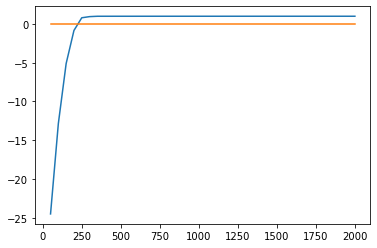

In [17]:
# 144

import sklearn.neural_network
import numpy
import matplotlib.pyplot

import itertools 

def test_NN(Ts, Hs, max_iter=200):
    NN = sklearn.neural_network.MLPRegressor(
        hidden_layer_sizes=(4,4), 
        activation='tanh', 
        random_state = 1, 
        max_iter=max_iter
        )
    Ts = Ts.reshape(-1, 1) # learned from error
    NN.fit(Ts, Hs)
#     predictions = NN.predict(Ts)
    score = NN.score(Ts, Hs)
    return score

def learning_curve(Ts, Hs, filename):
    max_iters, scores = None, None # place holder 
    #max_iter = 1
    NN = sklearn.neural_network.MLPRegressor(
        hidden_layer_sizes=(4,4),
        activation='tanh',
        random_state = 1,
        max_iter=50,
        warm_start=True
        )
    scores = []
    max_iters = []
    Ts = Ts.reshape(-1,1)
    #NN.fit(X,y)
    #score = NN.score(X,y)
    for i in range(50,2050,50):
        NN.fit(Ts,Hs)
        scorevar = NN.score(Ts,Hs)
        scores.append(scorevar)
        
        max_iters.append(i)
    matplotlib.pyplot.plot(max_iters,scores)
   # matplotlib.pyplot.savefig(filename + '.png')
    matplotlib.pyplot.savefig(filename)
    max_iters = numpy.asarray(max_iters)
    scores = numpy.asarray(scores)
    return max_iters, scores

def self_checker(*args): 
    X, y = learning_curve(*args)
    print (type(X), X)
    print (type(y), y)
    import hashlib
    print (hashlib.md5(open(args[2], "rb").read()).hexdigest())

def f(a, b, c):
    """
    a, b: 1-D numpy.ndarray
    c: str, placeholder
    """
    return a+b, a-b, a*b

if __name__ == "__main__":
    import warnings
    warnings.filterwarnings("ignore")

    self_checker(numpy.array([1,2]), numpy.array([3,4]), "test.png")
    print()
    self_checker(numpy.array([1,2,3,4]), numpy.array([-1,-1,-1,-1]), "test.pdf")